compute

In [1]:
phy_x = 5 
phy_y = 13.1
pix_x = [61, 32, 21]
pix_y = [157, 84, 55]
distance = [60, 120, 180]

list_kxf = []
list_kyf = []

for i, d in enumerate(distance):
    print(pix_x[i],pix_y[i],d, phy_x, phy_y)
    kxf = pix_x[i] *d / phy_x
    kyf = pix_y[i] *d / phy_y

    list_kxf.append(kxf)
    list_kyf.append(kyf)
    print(kxf, kyf)

print('-->', list_kxf)
print('-->', list_kyf)
kxf = (sum(list_kxf)/3)
kyf = (sum(list_kyf)/3)

print(kxf, kyf)

test_distance = [75, 100, 125]
predic_x = []
predic_y = []
for z in test_distance:
    dpx_x = kxf *phy_x /z
    dpx_y = kyf *phy_y /z
    predic_x.append(dpx_x)
    predic_y.append(dpx_y)

print('--->',predic_x,predic_y)


# dx = []
# dy = []
for i, z in enumerate (test_distance):
    z_new_x = kxf * phy_x / predic_x[i]
    z_new_y = kyf * phy_y / predic_y[i]
    print(z_new_x, z_new_y)


61 157 60 5 13.1
732.0 719.0839694656489
32 84 120 5 13.1
768.0 769.4656488549618
21 55 180 5 13.1
756.0 755.7251908396947
--> [732.0, 768.0, 756.0]
--> [719.0839694656489, 769.4656488549618, 755.7251908396947]
752.0 748.091603053435
---> [50.13333333333333, 37.6, 30.08] [130.66666666666663, 97.99999999999999, 78.39999999999999]
75.0 75.00000000000001
100.0 100.0
125.0 124.99999999999999


plot 60 120 180

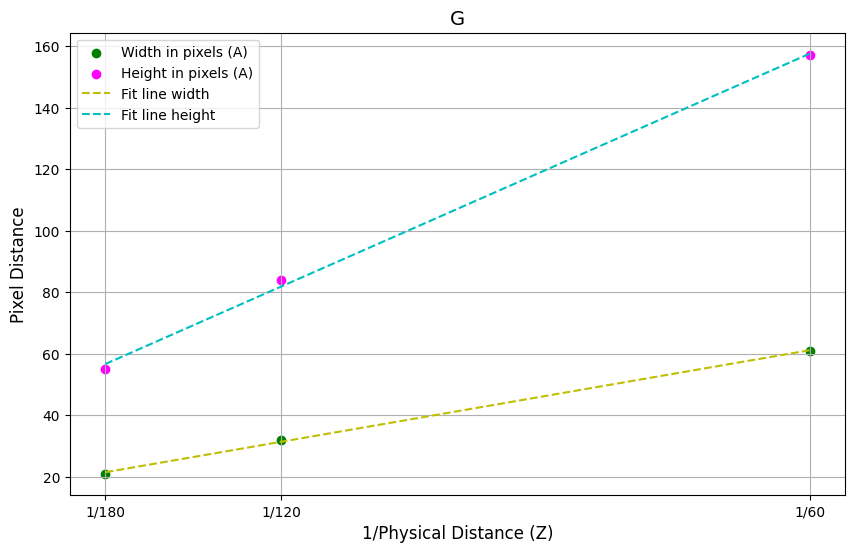

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

# Updated data (1/z for new data, as fractions)
z_new = [Fraction(1, 60), Fraction(1, 120), Fraction(1, 180)]  # New physical distances (1/z)
dx_new = [61, 32, 21]  # New pixel distances in the x-axis (width)
dy_new = [157, 84, 55]  # New pixel distances in the y-axis (height)

# # Existing data (1/z for existing data, as fractions)
# z = [Fraction(1, 75), Fraction(1, 100), Fraction(1, 125)]  # Physical distances (1/z)
# dx_l = [50.13, 37.6, 30.08]  # Pixel distances in the x-axis (width)
# dy_l = [130.67, 98.0, 78.4]  # Pixel distances in the y-axis (height)

# Convert fractions to float for plotting (necessary for matplotlib)
z_new_np = np.array([float(f) for f in z_new])
# z_np = np.array([float(f) for f in z])

# Plot the pixel distances vs. 1/Z (physical distance)
plt.figure(figsize=(10, 6))

# Plot new data (z_new, dx_new, dy_new) in different colors
plt.scatter(z_new_np, dx_new, color='green', label='Width in pixels (A)', marker='o')
plt.scatter(z_new_np, dy_new, color='magenta', label='Height in pixels (A)', marker='o')

# # Plot existing data (z, dx_l, dy_l) in one color
# plt.scatter(z_np, dx_l, color='blue', label='Width in pixels (F)', marker='x')
# plt.scatter(z_np, dy_l, color='red', label='Height in pixels (F)', marker='x')

# Linear regression for new data (dx_new and dy_new)
dx_new_np = np.array(dx_new)
dy_new_np = np.array(dy_new)

# Fit linear regression lines for new data only
coeffs_dx_new = np.polyfit(z_new_np, dx_new_np, 1)  # Fit a line (degree 1)
line_dx_new = np.polyval(coeffs_dx_new, z_new_np)  # Calculate the fitted values

coeffs_dy_new = np.polyfit(z_new_np, dy_new_np, 1)
line_dy_new = np.polyval(coeffs_dy_new, z_new_np)

# Plot regression lines for new data
plt.plot(z_new_np, line_dx_new, 'y--', label=f'Fit line width')
plt.plot(z_new_np, line_dy_new, 'c--', label=f'Fit line height')

# Set custom x-ticks with fraction labels
z_ticks =  z_new #+ z  # Combine both sets of z values
z_ticks_float = [float(f) for f in z_ticks]  # Convert fractions to floats for plotting
z_tick_labels = [str(f) for f in z_ticks]  # Keep the fraction representation as labels

plt.xticks(z_ticks_float, z_tick_labels)

# Graph formatting
plt.xlabel('1/Physical Distance (Z)', fontsize=12)
plt.ylabel('Pixel Distance', fontsize=12)
plt.title('G', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

plot all

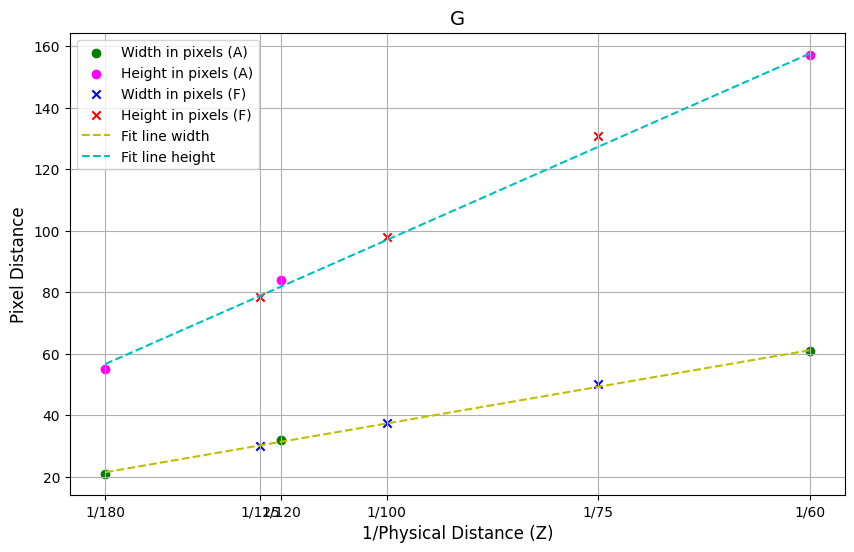

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

# Updated data (1/z for new data, as fractions)
z_new = [Fraction(1, 60), Fraction(1, 120), Fraction(1, 180)]  # New physical distances (1/z)
dx_new = [61, 32, 21]  # New pixel distances in the x-axis (width)
dy_new = [157, 84, 55]  # New pixel distances in the y-axis (height)

# Existing data (1/z for existing data, as fractions)
z = [Fraction(1, 75), Fraction(1, 100), Fraction(1, 125)]  # Physical distances (1/z)
dx_l = [50.13, 37.6, 30.08]  # Pixel distances in the x-axis (width)
dy_l = [130.67, 98.0, 78.4]  # Pixel distances in the y-axis (height)

# Convert fractions to float for plotting (necessary for matplotlib)
z_new_np = np.array([float(f) for f in z_new])
z_np = np.array([float(f) for f in z])

# Plot the pixel distances vs. 1/Z (physical distance)
plt.figure(figsize=(10, 6))

# Plot new data (z_new, dx_new, dy_new) in different colors
plt.scatter(z_new_np, dx_new, color='green', label='Width in pixels (A)', marker='o')
plt.scatter(z_new_np, dy_new, color='magenta', label='Height in pixels (A)', marker='o')

# Plot existing data (z, dx_l, dy_l) in one color
plt.scatter(z_np, dx_l, color='blue', label='Width in pixels (F)', marker='x')
plt.scatter(z_np, dy_l, color='red', label='Height in pixels (F)', marker='x')

# Linear regression for new data (dx_new and dy_new)
dx_new_np = np.array(dx_new)
dy_new_np = np.array(dy_new)

# Fit linear regression lines for new data only
coeffs_dx_new = np.polyfit(z_new_np, dx_new_np, 1)  # Fit a line (degree 1)
line_dx_new = np.polyval(coeffs_dx_new, z_new_np)  # Calculate the fitted values

coeffs_dy_new = np.polyfit(z_new_np, dy_new_np, 1)
line_dy_new = np.polyval(coeffs_dy_new, z_new_np)

# Plot regression lines for new data
plt.plot(z_new_np, line_dx_new, 'y--', label=f'Fit line width')
plt.plot(z_new_np, line_dy_new, 'c--', label=f'Fit line height')

# Set custom x-ticks with fraction labels
z_ticks =  z + z_new   # Combine both sets of z values
z_ticks_float = [float(f) for f in z_ticks]  # Convert fractions to floats for plotting
z_tick_labels = [str(f) for f in z_ticks]  # Keep the fraction representation as labels

plt.xticks(z_ticks_float, z_tick_labels)

# Graph formatting
plt.xlabel('1/Physical Distance (Z)', fontsize=12)
plt.ylabel('Pixel Distance', fontsize=12)
plt.title('G', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()